# Gradient descent 

### Difference between gradient descent and stochastic gradient descent
Gradient and Stochastic Gradient Descent are ways of optimizing model parameters in an iterative manner in order to minimize the error functions.
While Gradient Descent re-adjusts the optimal weights by calculating the local minima over the entire set of training data, Stocastic Gradient Descent keeps makes minor updates to the weights on each training data, one at a time.

#### **Gradient descent:**

##### Pros:

*   It takes less noisy steps towards the minima of the loss function because it takes the average of all the training sample rather than a single sample
*   It produces more stable gradient descent convergence and stable error gradient than the SDG

##### Cons:

*   Gradient Descent can take too long to process all the training samples as a batch, if the number of parameters are too large.
*   Could approach at a local minima instead of the global minima of the cost function
*   Model has to be retrained and re-deployed periodically should trends change and our training dataset becomes obsolete

#### **Stochastic Gradient Descent:**

##### Pros:

*   Due to the frequent updates that it takes to reach the minima, the loss function has oscillations which can help it get out of the local minima 
*   For large dataset, it can converge faster as it updates the parameters more frequently
*   Ideal for on-line or real-time learning.
*   Model can adapt to changing trends over time without having to be re-trained and deployed

##### Cons:

*   Noisy steps can take longer to converge onto the minima of the loss function

***

# Implementing Stochastic gradient descent

Here, we are coding an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$ 
The **init** function of the class takes as input the learning rate, regularization constant and number of epochs. <br>
The **fit** method must take as input X, y. <br>
The **predict** method takes an X value (optionally, an array of values). <br>

In [7]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        # please put your codes here to update the self.coef using SGD
        self.coef -= gradient*(self.learning_rate)
        # regularizing all except the w0 term
        self.coef[1:] -= (self.regularization*self.coef[1:])*(self.learning_rate)
    
    def fit(self, X, y, update_rule='bgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        
        for epoch in range(self.n_epoch):
            if update_rule == "bgd":
                gradient = np.dot(X.T,(self.linearPredict(X) - y))
                self.sgd(gradient)
            
            elif update_rule == "sgd":
                gradient = np.array([0.0]*self.coef.shape[0])
                for i in range(X.shape[0]):
                # Compute error
                   #please put your codes here
                   hypothesis = self.linearPredict(X[i]) # Predicted Y
                   error = hypothesis - y[i]
                # Compute gradients
                    #please put your codes here
                   gradient = error*X[i]   
                # Update weights
                   self.sgd(gradient)

            coefs.append(self.coef.copy())
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X
      return np.dot(X, self.coef)

In [8]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Reporting the MSEs for different hyper-parameters

In [9]:
mse = pd.DataFrame(columns=learning_rate, index=regularization)
for alpha in learning_rate:
    for lamda in regularization:
        mdl = Regression(learning_rate = alpha, regularization= lamda, n_epoch= n_epochs)
        mdl.fit(X,y, update_rule="sgd", plot= False)
        mse[alpha][lamda] = mdl.lowest_mse
mse

/var/folders/y3/v6fyb_rs72bcn7ftc3lvwvmw0000gn/T/ipykernel_43154/2036988196.py:21: RuntimeWarning: overflow encountered in multiply
  self.coef[1:] -= (self.regularization*self.coef[1:])*(self.learning_rate)#*(1/self.N))
/var/folders/y3/v6fyb_rs72bcn7ftc3lvwvmw0000gn/T/ipykernel_43154/2036988196.py:19: RuntimeWarning: invalid value encountered in subtract
  self.coef -= gradient*(self.learning_rate)#*(1/self.N))
/var/folders/y3/v6fyb_rs72bcn7ftc3lvwvmw0000gn/T/ipykernel_43154/2036988196.py:21: RuntimeWarning: invalid value encountered in subtract
  self.coef[1:] -= (self.regularization*self.coef[1:])*(self.learning_rate)#*(1/self.N))
/var/folders/y3/v6fyb_rs72bcn7ftc3lvwvmw0000gn/T/ipykernel_43154/2036988196.py:49: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
/var/folders/y3/v6fyb_rs72bcn7ftc3lvwvmw0000gn/T/ipykernel_43154/2036988196.py:21: RuntimeWarning: invalid value encountered in multiply
  self.coef[1:] -= (self.regularization*self.coef[1:])*

,0.0001,0.0010,0.0100,0.1000,1.0000,10.0000,100.0000
0,0.036821,0.030496,0.027391,0.030988,inf,NaN,NaN
10,0.040382,0.033707,0.033821,0.034648,NaN,NaN,NaN
100,0.040672,0.033795,0.033805,NaN,NaN,NaN,NaN


MSE for SGD with Leaning Rate 0.01 and Regularisation Coefficient 0: 0.0274


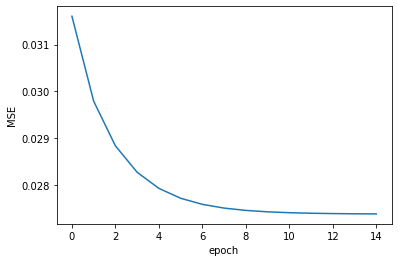

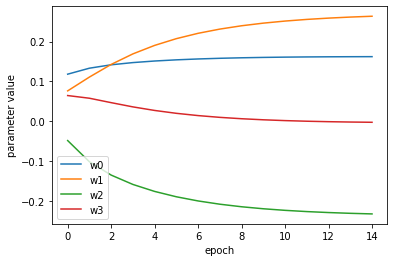

In [10]:
# Minimum MSE for learning rate = 0.01 and regularization parameter = 0
alpha = 0.01
lamda = 0
mdl = Regression(learning_rate = alpha, regularization= lamda, n_epoch= n_epochs)
mdl.fit(X,y, update_rule="sgd", plot= True)
print("MSE for SGD with Leaning Rate {alpha} and Regularisation Coefficient {lamda}: {mse}".format(alpha = alpha, lamda = lamda, mse = round(mdl.lowest_mse, 4)))


MSE for SGD with Leaning Rate 0.001 and Regularisation Coefficient 0: 0.0305


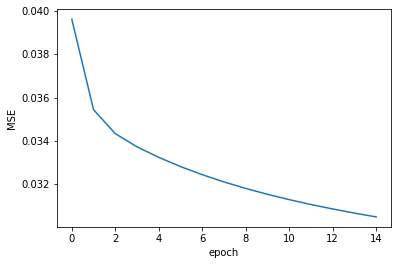

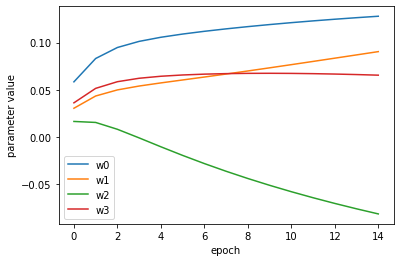

In [11]:
# Second Minimum MSE for learning rate = 0.001 and regularization parameter = 0
alpha = 0.001
lamda = 0
mdl = Regression(learning_rate = alpha, regularization= lamda, n_epoch= n_epochs)
mdl.fit(X,y, update_rule="sgd", plot= True)
print("MSE for SGD with Leaning Rate {alpha} and Regularisation Coefficient {lamda}: {mse}".format(alpha = alpha, lamda = lamda, mse = round(mdl.lowest_mse, 4)))


- **Minimum**
  - Leaning Rate: 0.01
  - Regularisation Coefficient: 0
  - MSE: 0.0274

- **Second Smallest**
  - Leaning Rate: 0.001
  - Regularisation Coefficient: 0
  - MSE: 0.0305
